In [34]:
import pandas as pd
df= pd.read_csv("gender_classification_v7.csv")

In [35]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [36]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [37]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [38]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [39]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
numeric_cols=df.select_dtypes(include="number").columns

<Axes: xlabel='long_hair', ylabel='Count'>

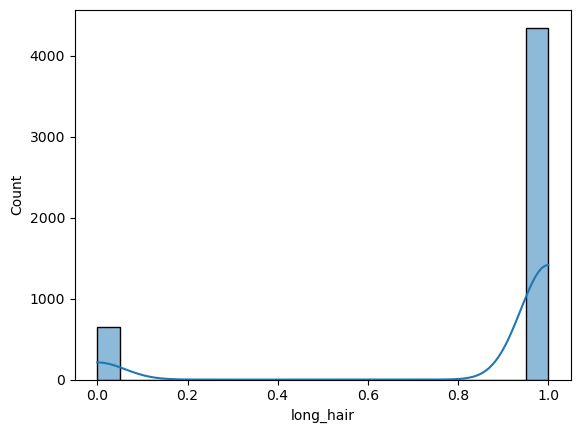

In [42]:
sns.histplot(df["long_hair"],bins=20,kde=True)

<Axes: xlabel='nose_wide', ylabel='Count'>

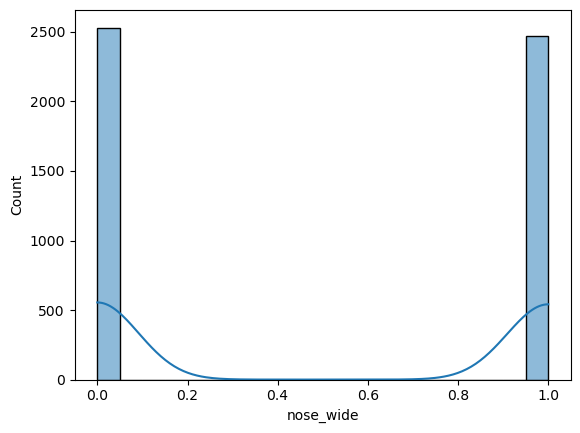

In [43]:
sns.histplot(df["nose_wide"],bins=20,kde=True)

In [44]:
columns=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    LOWER_BOUND = Q1-1.5*IQR
    UPPER_BOUND = Q3+1.5*IQR
    outliers = df[(df[col]  < LOWER_BOUND) | (df[col] > UPPER_BOUND)]
    print(outliers.shape)

(652, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)


In [47]:
columns=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']
for col in columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1

    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)
    print(outliers.shape)

(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)
(0, 8)


<Figure size 1900x1800 with 0 Axes>

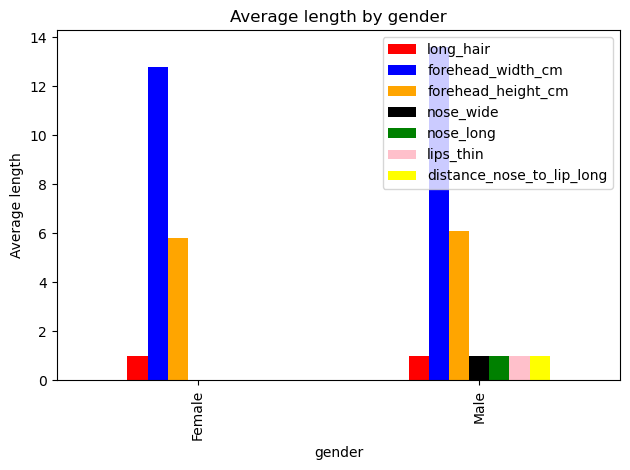

In [48]:
colors = ['red','blue','orange','black','green','pink','yellow']
plt.figure(figsize = (19,18 ))
avg_scores_by_gender = df.groupby ("gender")[['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']].median().reset_index()
avg_scores_by_gender.set_index("gender").plot(kind= 'bar',color=colors,width=0.5)
plt.title("Average length by gender")
plt.ylabel("Average length")
plt.tight_layout()
plt.show()

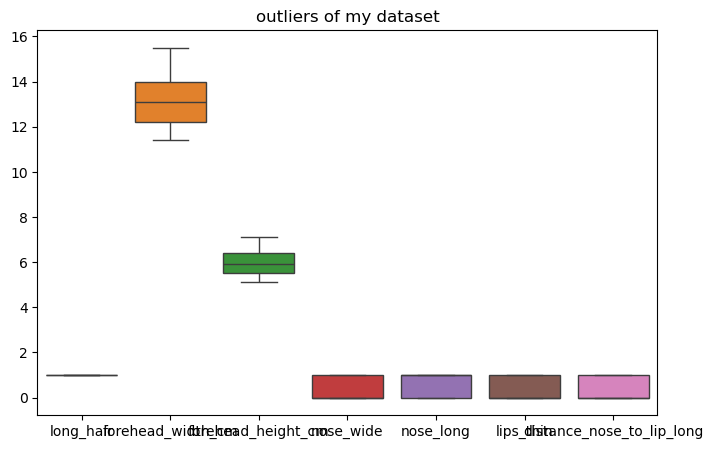

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df)
plt.title("outliers of my dataset")
plt.show()

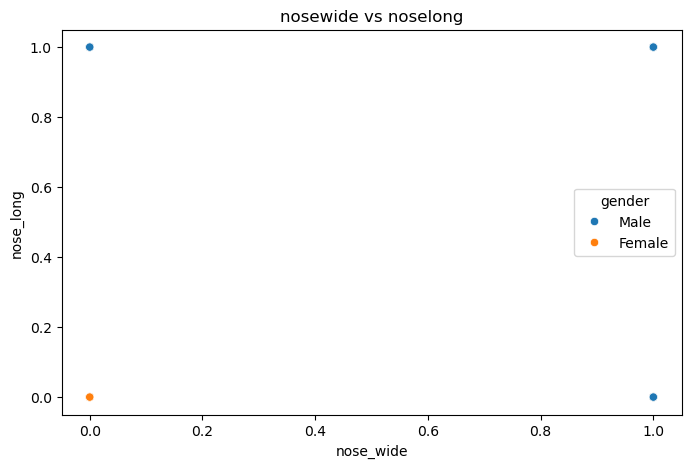

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='nose_wide', y='nose_long', hue='gender')
plt.title('nosewide vs noselong')
plt.show()

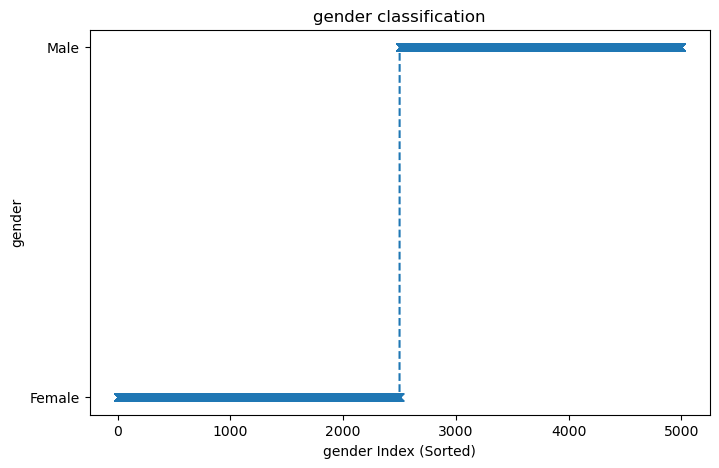

In [52]:
plt.figure(figsize=(8,5))
df_sorted = df.sort_values(by='gender')
plt.plot(df_sorted['gender'].values, marker='x' , linestyle='--')
plt.title("gender classification")
plt.xlabel("gender Index (Sorted)")
plt.ylabel("gender")
plt.show()